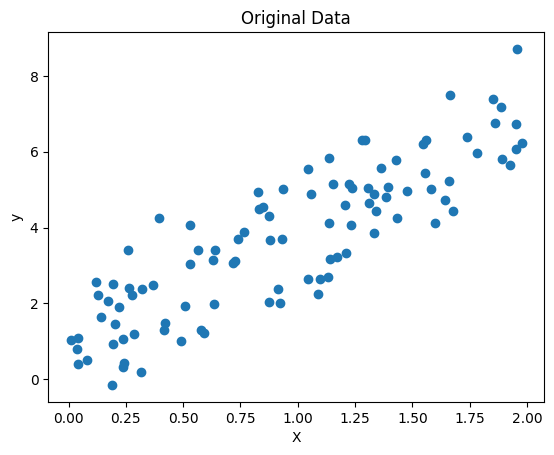

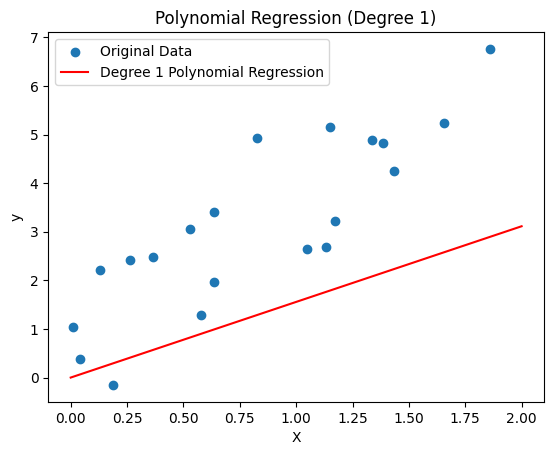

Mean Squared Error (Degree 1): 13.508065884577444


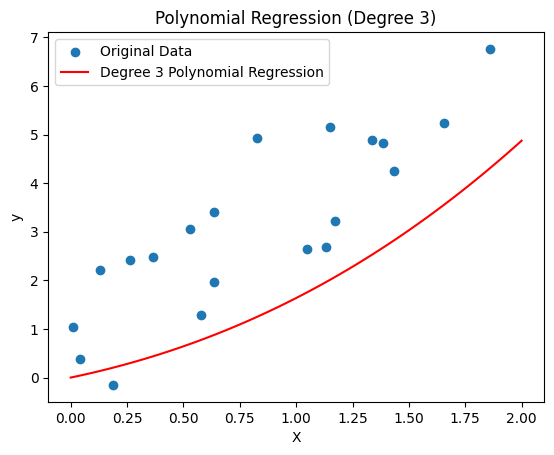

Mean Squared Error (Degree 3): 13.657580890176362


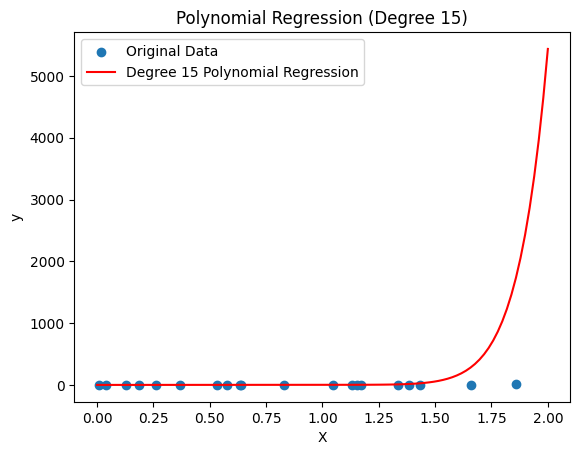

Mean Squared Error (Degree 15): 13.631051605151203


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + 0.5 * X**2 + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Plot the original data
plt.scatter(X, y, label='Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Data')
plt.show()

# Function to add polynomial features
def add_polynomial_features(X, degree):
    return np.concatenate([X**i for i in range(1, degree + 1)], axis=1)

# Function to perform polynomial regression using gradient descent with regularization
def polynomial_regression_regularized(X, y, degree, learning_rate=0.01, epochs=1000, alpha=0.1):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = 2/m * X.T.dot(error) + 2 * alpha * theta  # Regularization term added
        theta -= learning_rate * gradient

    return theta

# Function to make predictions using the polynomial regression model
def predict(X, theta):
    return X.dot(theta)

# Function to plot the polynomial regression model
def plot_polynomial_regression(X, y, theta, degree):
    X_range = np.linspace(0, 2, 100).reshape(-1, 1)
    X_poly_range = add_polynomial_features(X_range, degree)
    y_pred = predict(X_poly_range, theta)

    plt.scatter(X, y, label='Original Data')
    plt.plot(X_range, y_pred, 'r-', label=f'Degree {degree} Polynomial Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

# Perform polynomial regression for different degrees with feature scaling and regularization
degrees = [1, 3, 15]

for degree in degrees:
    scaler = StandardScaler()
    X_poly_train_scaled = scaler.fit_transform(add_polynomial_features(X_train, degree))
    theta = polynomial_regression_regularized(X_poly_train_scaled, y_train, degree, alpha=0.1)

    # Plot the polynomial regression model
    X_poly_test_scaled = scaler.transform(add_polynomial_features(X_test, degree))
    plot_polynomial_regression(X_test, y_test, theta, degree)

    # Calculate and print the mean squared error on the test set
    y_pred_test = predict(X_poly_test_scaled, theta)
    mse = np.mean((y_pred_test - y_test)**2)
    print(f'Mean Squared Error (Degree {degree}): {mse}')


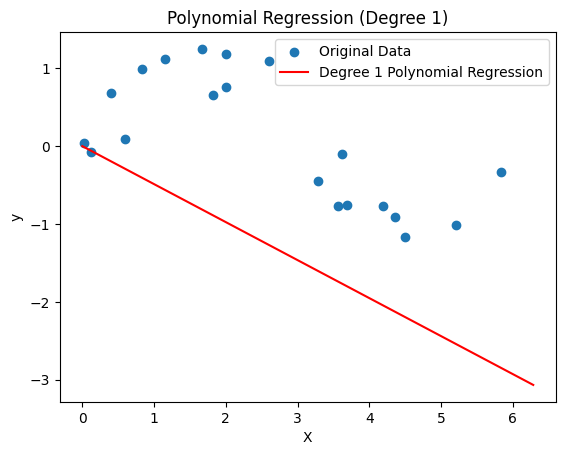

Mean Squared Error (Degree 1): 0.37442743821691626


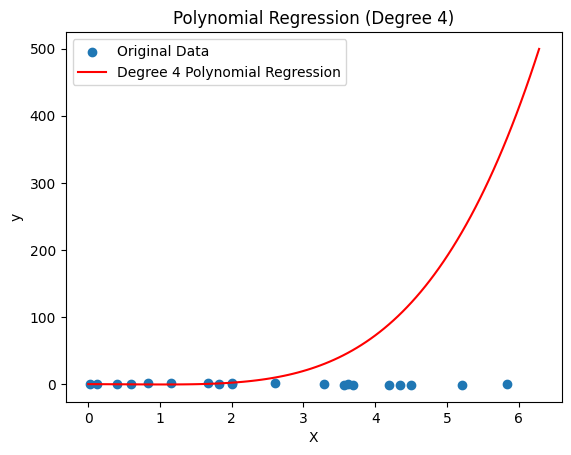

Mean Squared Error (Degree 4): 0.3397690934676235


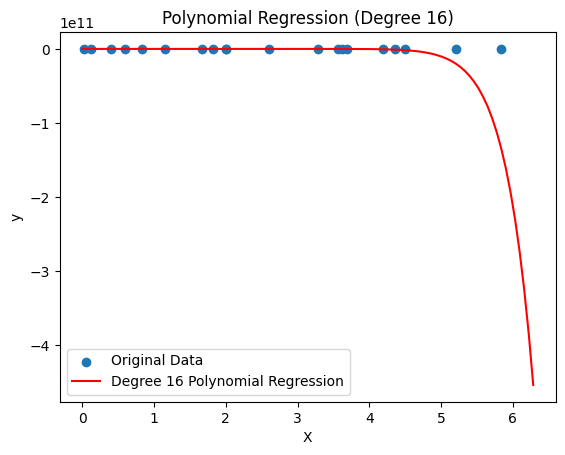

Mean Squared Error (Degree 16): 0.2800412240294864


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with a sine wave
np.random.seed(0)
X = 2 * np.pi * np.random.rand(100, 1)
y = np.sin(X) + 0.3 * np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Function to add polynomial features
def add_polynomial_features(X, degree):
    return np.concatenate([X**i for i in range(1, degree + 1)], axis=1)

# Function to perform polynomial regression using gradient descent with regularization
def polynomial_regression_regularized(X, y, degree, learning_rate=0.01, epochs=1000, alpha=0.1):
    m, n = X.shape
    theta = np.random.randn(n, 1)

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = 2/m * X.T.dot(error) + 2 * alpha * theta  # Regularization term added
        theta -= learning_rate * gradient

    return theta

# Function to make predictions using the polynomial regression model
def predict(X, theta):
    return X.dot(theta)

# Function to plot the polynomial regression model
def plot_polynomial_regression(X, y, theta, degree):
    X_range = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
    X_poly_range = add_polynomial_features(X_range, degree)
    y_pred = predict(X_poly_range, theta)

    plt.scatter(X, y, label='Original Data')
    plt.plot(X_range, y_pred, 'r-', label=f'Degree {degree} Polynomial Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

# Perform polynomial regression for different degrees with feature scaling and regularization
degrees = [1, 4, 16]

for degree in degrees:
    scaler = StandardScaler()
    X_poly_train_scaled = scaler.fit_transform(add_polynomial_features(X_train, degree))
    theta = polynomial_regression_regularized(X_poly_train_scaled, y_train, degree, alpha=0.1)

    # Plot the polynomial regression model
    X_poly_test_scaled = scaler.transform(add_polynomial_features(X_test, degree))
    plot_polynomial_regression(X_test, y_test, theta, degree)

    # Calculate and print the mean squared error on the test set
    y_pred_test = predict(X_poly_test_scaled, theta)
    mse = np.mean((y_pred_test - y_test)**2)
    print(f'Mean Squared Error (Degree {degree}): {mse}')
